## Load Stuff

In [1]:
import torch
from pydub import AudioSegment
from IPython.display import Audio
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize


/home/matthias/Documents/envs/alife-music/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Load Model

In [2]:
mario_lm = MarioLM()

Using shyamsn97/Mario-GPT2-700-context-length lm


/home/matthias/Documents/envs/alife-music/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1739: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


### Load Dataset (Optional)

In [3]:
dataset = MarioDataset(mario_lm.tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





#### View string representation of level

In [4]:
view_level(dataset.input_ids[:700], mario_lm.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

#### Image

##### Previewing the first 50 columns of the dataset

/usr/lib/python3/dist-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


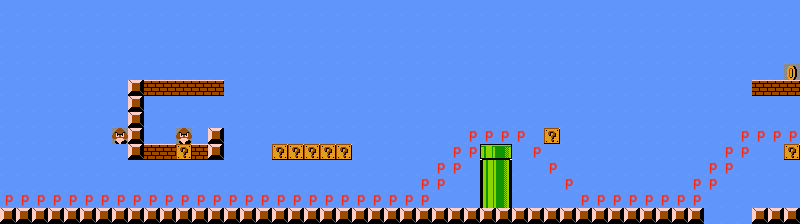

In [5]:
img = convert_level_to_png(dataset.input_ids[:700],  mario_lm.tokenizer)[0]
img

#### Set device

In [6]:
device = torch.device('cpu')
mario_lm = mario_lm.to(device)

## Generating Levels

In [7]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

##### We generate 1399 predictions for an even 1400 output (including the input seed which is just a single block). Mario Levels have height of 14, so we generate 100 columns. You don't have to worry about perfect dimensions, we'll trim the remainder for you!

In [8]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=70,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 70]), torch.Size([1, 71]) first: 56, last: 56: 100%|█| 70/


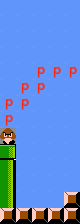

In [9]:
generated_level.img

#### Check if the model generated the correct level
##### Because of the stochastic nature of the model and the small training dataset, the model may generate levels that do not completely match the given prompt

In [10]:
generated_level.prompt

'no pipes, no enemies, little blocks, low elevation'

## Generate Midi

In [15]:
from math import floor
def coordinate_to_midi_y(x, y):
    # Example conversion: map x to note number and y to velocity
    tilesize = 16.0
    y = int(floor(y / tilesize))
    min_note = 46
    max_note = 76
    duration = 480
    velocity = 64
    y_max = 13
    note = int(y/y_max * (max_note - min_note))
    return note, velocity, duration

In [16]:
mid = generated_level.generate_midi("super_mario.mid", coord2midi_callback=coordinate_to_midi_y)


Running Astar agent on level! -- /tmp/tmp7e7_ztmr.txt
/home/matthias/Documents/src/mario-gpt/mario_gpt/simulator/img/


In [17]:

# Convert MIDI to WAV using timidity
!timidity super_mario.mid -Ow -o super_mario.wav

# Play the WAV file in the notebook
audio = AudioSegment.from_wav('super_mario.wav')
#audio.export('super_mario.mp3', format='mp3')  # Convert to MP3 if needed
Audio('super_mario.wav')  # or Audio('simple_melody.mp3')


Playing super_mario.mid
MIDI file: super_mario.mid
Format: 1  Tracks: 1  Divisions: 480


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Playing time: ~23 seconds
Notes cut: 0
Notes lost totally: 0
